# Posts

## Posts patterns - most common categories and tags, read times

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# import data
posts_df = pd.read_csv('data/TIA_posts.csv')
posts_df.head()

,id,page_number,date_gmt,modified_gmt,title,slug,status,type,link,content,excerpt,categories,tags,read_time
0,437234,1,2017-10-25T06:00:08,2017-10-25T06:00:08,Brief: Ant Financial and Globe roll out cashle...,ant-alipay-globe-philippines,publish,post,https://www.techinasia.com/ant-alipay-globe-ph...,"<div id=""attachment_437243"" class=""wp-caption ...",<p>The Alibaba affiliate is backing Globe Tele...,"Brief,Fintech,News","cashless,cashless payments,ewallets,mobile pay...",1
1,437178,1,2017-10-25T05:43:59,2017-10-25T06:25:03,"How Baidu, Alibaba, and Tencent plan to domina...",baidu-alibaba-tencent-dominate-chinas-online-i...,publish,post,https://www.techinasia.com/baidu-alibaba-tence...,"<div id=""attachment_110421"" class=""wp-caption ...",<p>The race to capture China’s nascent online ...,"Features,Fintech","Alibaba,Baidu,China,fintech,Tencent,Zhongan",4
2,437154,1,2017-10-25T05:00:44,2017-10-25T03:19:53,Video: Better machine translation will be a hu...,video-jobs-machine-translation-will-kill,publish,post,https://www.techinasia.com/video-jobs-machine-...,<p>It’s not just self-driving cars that are se...,<p>It’s not just self-driving cars that are se...,Analysis,"data series,job killers,language translation,l...",1
3,437176,1,2017-10-25T03:35:27,2017-10-25T03:17:00,Video: This robotic dog from China looks prett...,robo-dog-from-china,publish,post,https://www.techinasia.com/robo-dog-from-china,<p>This new robot can even withstand the kick ...,<p>This robo dog from China’s Unitree Robotics...,"News,Robotics","Boston Dynamics,China,robotics,robots,TIA vide...",1
4,437027,1,2017-10-25T02:43:59,2017-10-25T04:14:02,"Average value of ICO climbs to $10m, throws VC...",vc-funding-dilemma-as-average-value-of-ico-cli...,publish,post,https://www.techinasia.com/vc-funding-dilemma-...,"<div id=""attachment_368400"" class=""wp-caption ...",<p>Fears mount of mismanagement of “over-capit...,"Cryptocurrencies,Features,Fintech","bitcoin,blockchain,blockchain startups,CB Insi...",6


In [3]:
cat_lists = posts_df['categories'].apply(lambda x:str(x).split(','))

In [4]:
sum_cat_lists = cat_lists.sum()

In [5]:
from collections import Counter

#shortlist most common categories
cat_counts = dict(Counter(sum_cat_lists).most_common(5))

In [6]:
cat_counts

{'Community': 125,
 'Investments': 199,
 'News': 406,
 'Startups': 391,
 'Tips': 116}

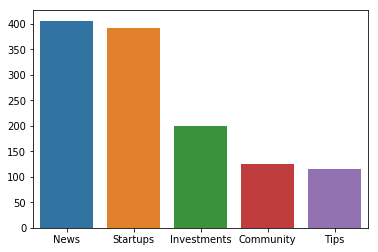

In [7]:
sns.barplot(x=list(cat_counts.keys()), y=list(cat_counts.values()))

As expected, most posts are news, and popular categories are startups and investments.

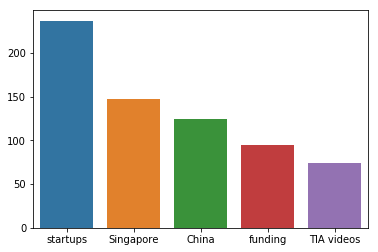

In [8]:
# find most common tags
tag_lists = posts_df['tags'].apply(lambda x:str(x).split(','))
sum_tag_lists = tag_lists.sum()
tag_counts = dict(Counter(sum_tag_lists).most_common(5))
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))

As expected, startups is a common tag.
<br>
Seems like majority of the articles are related to Singapore. China is close behind.

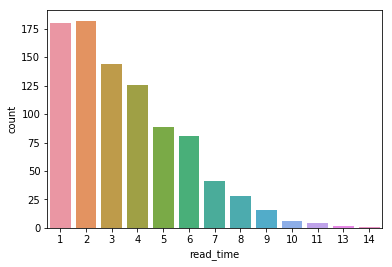

In [9]:
# plot out the read times
read_time = posts_df['read_time'].apply(lambda x:int(x))
sns.countplot(read_time)

Many articles are a short read (1 to 2-minute reads are common).

## Wordcloud of posts

I am going to plot a wordcloud to see if there are any interesting patterns in the words used in the posts.
<br>
While scraping the data, I noted that the content is stored in HTML markdown form, so I'll definitely have to do some text cleaning.

In [10]:
posts_df['content'].head()

0    <div id="attachment_437243" class="wp-caption ...
1    <div id="attachment_110421" class="wp-caption ...
2    <p>It’s not just self-driving cars that are se...
3    <p>This new robot can even withstand the kick ...
4    <div id="attachment_368400" class="wp-caption ...
Name: content, dtype: object

In [11]:
import re

In [12]:
text = ' '.join(posts_df['content'])

In [13]:
def clean_text(text):
    # remove HTML tags 
    text = re.sub('<[^<]+?>', '', text)

    #remove \n, replace with space
    text = re.sub('\n', '', text)

    # remove URLs, @tagging
    text = " ".join([text for text in text.split()
                                if 'http' not in text
                                    and not text.startswith('@')
                                ])
    
    # make sure we get words only (i.e. strip out punctuation, non-ASCII chars)
    text_list = re.findall(r'\w+', text)
    
    # make lower case
    text = ' '.join(text_list).lower()
    
    return text

In [14]:
text = clean_text(text)

In [15]:
#commented out because output is weird
# # stemming 
# from gensim import parsing
# text = parsing.stem_text(text)

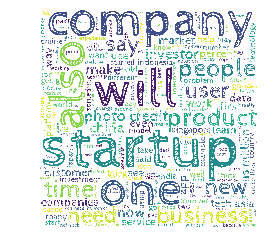

In [16]:
wordcloud = WordCloud(
                      font_path='/home/celesteanglm/.font/CabinSketch-Regular.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=2000
                     ).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('output/wordcloud1.png', dpi=500)
plt.show()

Looks like many posts are about startups and companies.
<br>
We can also tell that common themes are related to the business, people and the products (of startups, probably).
<br>
There are some words like customers and users, probably when posts are talking about the users of startups' products.
<br>
Another running theme is money/investment, with words like investor, millions, billions.
<br>
<br>
At this point I think an interesting area to explore is topic modelling - to see how these words/subjects link together.

## Topic modelling

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
# for topic modelling I'm going to focus on titles
documents = list(posts_df['title'].apply(clean_text))

In [43]:
no_features = 1000
no_components = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_components=no_components, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [44]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic {}:'.format(topic_idx+1))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic 1:
jack ma ecommerce startup vietnam
Topic 2:
developer startup discuss job went
Topic 3:
singapore indonesia startup app raises
Topic 4:
video china just huge solar
Topic 5:
guide founder early engineer stage
Topic 6:
learned india opinion lessons iphone
Topic 7:
data science simplified vc started
Topic 8:
startup hong kong business japanese
Topic 9:
startup brief singapore tech startups
Topic 10:
brief uber alibaba softbank ico


Not all results are immediately interpretable but here are some insights are first glance:
<li>From topic 5, we can tell that many articles are guides to early stage startup founder, giving tips such as how to hire engineers</li>
<li>From topic 7, it seems that some articles are simple guides to data science, probably from a founder's persepctive. It could also mean that many articles are about VCs investing in data science startups.</li>
<li>Topic 3 consists of news related to Singapore/Indonesian startups raising C amount of money.</li>
<li>Given Jack Ma's influence in ecommerce, and his visits to Vietnam, it is not surprising that topic 1 is about him

## Classification by tag

Assuming that tags are currently not being automatically created, I think it might be possible to create a automated tag generation based on the content of posts.
<br>
However, an issue now is that some posts have multiple tags (i.e. multiclass classifiation). I haven't tried this before, but i found this stackoverflow thread: https://stackoverflow.com/questions/10526579/use-scikit-learn-to-classify-into-multiple-categories, hence I am going to adapt it to this problem and try it out anyway.

In [78]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
X_train = list(posts_df['content'].apply(clean_text))
y_train_text = cat_lists 

In [68]:
# for the test set, I randomly picked out newer TIA articles which I probably didn't scrape.
with open('tests/test1.txt', 'r') as f:
    test1 = f.read()

with open('tests/test2.txt', 'r') as f2:
    test2 = f2.read()

In [74]:
x_test1 = clean_text(test1)
x_test2 = clean_text(test2)

X_test = pd.Series([x_test1, x_test2])

In [83]:
model = GradientBoostingClassifier()

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_train_text)

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(model))])

classifier.fit(X_train, Y)
predicted = classifier.predict(X_test)
all_labels = mlb.inverse_transform(predicted)

for i in range(len(all_labels)):
    labels = all_labels[i]
    print('test {0} => {1}'.format(i, ', '.join(labels)))

test 1 => Ecommerce, Startups
test 2 => Cryptocurrencies, Startups


In [85]:
model2 = RandomForestClassifier()

classifier2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(model))])

classifier2.fit(X_train, Y)
predicted2 = classifier.predict(X_test)
all_labels2 = mlb.inverse_transform(predicted2)

for i in range(len(all_labels2)):
    labels2 = all_labels2[i]
    print('test {0} => {1}'.format(i, ', '.join(labels2)))

test 0 => Ecommerce, Startups
test 1 => Cryptocurrencies, Startups


It does seem like the classification is working; if you take a look at the the articles, these are quite suitable tags.
<br>
Disclaimer: I did not handpick the test cases ;)

# Comments

## Post patterns

In [87]:
comments_df = pd.read_csv('data/TIA_posts_comments.csv')
comments_df.head()

,post_id,id,post_title,post_link,content,excerpt,author_id,author_display_name,parent,upvotes
0,437011,315658,Travel activities startup Klook nets $60m,https://www.techinasia.com/klook-series-c-fund...,"<p>Woo, knowing the name for 2 years, well des...","Woo, knowing the name for 2 years, well deserv...",50696,William Lam,0,1
1,436976,315655,Asian tech news roundup – Oct 24,https://www.techinasia.com/apac-news-roundup-2...,<p>Good trending on tech hey! Nice article</p>\n,Good trending on tech hey! Nice article,137244,Samueltian Steven,0,0
2,436976,315649,Asian tech news roundup – Oct 24,https://www.techinasia.com/apac-news-roundup-2...,<p>Cocoon capital article is ‘page not found’i...,Cocoon capital article is 'page not found'ing....,35443,Stuart Lansdale,0,0
3,436976,315651,Asian tech news roundup – Oct 24,https://www.techinasia.com/apac-news-roundup-2...,<p>Hi Stuart. That’s odd – checked it out and ...,Hi Stuart. That's odd - checked it out and the...,124235,Jack Ellis,315649,0
4,436976,315650,Asian tech news roundup – Oct 24,https://www.techinasia.com/apac-news-roundup-2...,<p>thanks for the heads up. Just checked. Link...,thanks for the heads up. Just checked. Link se...,217,Terence Lee,315649,0


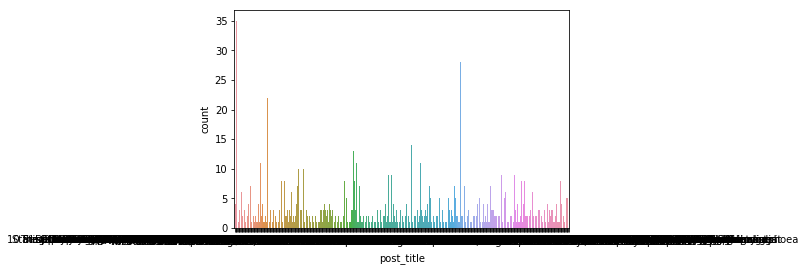

In [98]:
# we count the most commented posts
data = comments_df['post_title']
sns.countplot(data)

The x axis is not very readable but it is quite obvious that 3 specific post title have significantly higher comment counts. 
<br>
Now, we find out which 3 posts titles they are:

In [97]:
data.value_counts()[:3]

10 fresh tech and startup jobs in Asia this week: Lazada, Ninja Xpress, and AdAsia Holdings    35
What I learned building a mobile payments app in Singapore and facing DBS                      28
11 months and $750k later, I closed my drop shipping business. Here’s why                      22
Name: post_title, dtype: int64

This simple exercise can tell TIA writers more about how they can use their titles to invite more discussion in comments. After all, an important part of a tech media company like TIA is building a community and it's important for readers to discuss and share their views in the comments.
<br>
On first glance, it seems that tech-job postings and 'personal sharing' posts have a large number of comments.
<br>
<br>
I am also going to plot the number of upvotes, since this data is available.

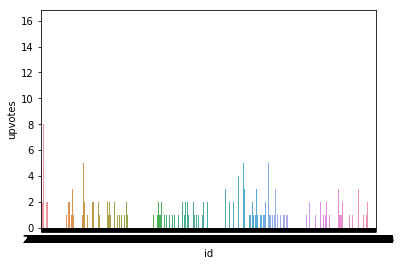

In [100]:
# we count the most upvoted comments
data = comments_df['upvotes']
sns.barplot(x=comments_df['id'],y=comments_df['upvotes'])

In [114]:
# the above graph is not interpretable, so we pick the top few
upvotes_df = comments_df.filter(['id','upvotes'], axis=1)

In [115]:
upvotes_df.head()

,id,upvotes
0,315658,1
1,315655,0
2,315649,0
3,315651,0
4,315650,0


In [121]:
data = upvotes_df.sort_values(['upvotes'], ascending=False)[:5]

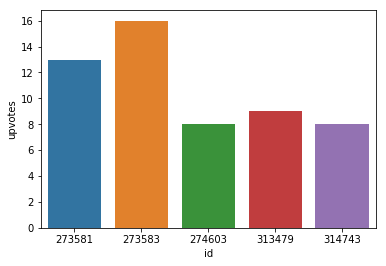

In [123]:
sns.barplot(x=data['id'], y=data['upvotes'])

In [126]:
data

,id,upvotes
6,273583,16
5,273581,13
1112,313479,9
7,274603,8
480,314743,8


Time to find out which comments are the most upvoted!

In [131]:
most_upvoted_ids = list(data['id'])

def is_most_upvoted(comment_id):
    if comment_id in most_upvoted_ids:
        return True
    else:
        return False

In [136]:
comments_df[comments_df['id'].apply(is_most_upvoted)].sort_values(['upvotes'], ascending=False)

,post_id,id,post_title,post_link,content,excerpt,author_id,author_display_name,parent,upvotes
6,307313,273583,10 fresh tech and startup jobs in Asia this we...,https://www.techinasia.com/tech-startup-job-li...,<p>Which are you most interested in?</p>\n,Which are you most interested in?,38356,Louisa Chiew,273581,16
5,307313,273581,10 fresh tech and startup jobs in Asia this we...,https://www.techinasia.com/tech-startup-job-li...,<p>Hope to see more of this in the coming week...,Hope to see more of this in the coming weeks!,42335,Imran Khan,0,13
1112,415874,313479,Winners and losers in Amazon’s entry into Sout...,https://www.techinasia.com/winners-losers-amaz...,<p>Great piece. Tia has really grown to be a s...,Great piece. Tia has really grown to be a seri...,89,Darius Cheung,0,9
7,307313,274603,10 fresh tech and startup jobs in Asia this we...,https://www.techinasia.com/tech-startup-job-li...,<p>Neat addition: Uber and App Annie. 🙂</p>\n,Neat addition: Uber and App Annie. :),66,Willis Wee,0,8
480,427213,314743,Accelerators scramble for new revenue streams ...,https://www.techinasia.com/accelerators-scramb...,<p>No surprises here. Acceleration programs te...,No surprises here. Acceleration programs tend ...,117207,David Asimov,0,8


These are the most upvoted comments. The first few are written by people at TIA - good job in helping to spread virality!
<br>
The last is written by none other than Darius Cheng, CEO of 99.co. Perhaps getting get known founders/CEO in the Singapore startup scene to guest post/comment in TIA would help to promote virality?
<br>
<br>
I suspect many of the upvotes came from the TIA team though, so I'm not sure of the real value of this analysis ;)

With that, thanks for reading! I had a couple of ideas about plotting time trends and sentiment analysis, but did not implement them eventually due to lack of time. However, I would be happy to show you the related work I have done in the past!

# Thank you for reading!